# Section 1- Import and Setup

Use this if using data from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Following two lines of code are to be done only once at the beginning and then relaunch the VM in order to have graphiz

In [ ]:
!pip install graphviz

In [ ]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


To check if Graphviz was correctly installed, do the following

In [ ]:
import graphviz

Install the package with latest release of Causal-Learn

In [ ]:
!pip install git+https://github.com/cmu-phil/causal-learn.git

  Cloning https://github.com/cmu-phil/causal-learn.git to /tmp/pip-req-build-5aw09si2
  Running command git clone -q https://github.com/cmu-phil/causal-learn.git /tmp/pip-req-build-5aw09si2


In [ ]:
import pandas as pd
import numpy as np
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


Use this for drive data

In [ ]:
my_data = np.genfromtxt(open('/content/drive/My Drive/_take_off_special_nechool_and_elementary.csv', 'r'), delimiter=',', skip_header=1)
my_data.shape

(2189, 13)

or this for import data

In [ ]:
my_data = np.genfromtxt('_take_off_special_nechool_and_elementary.csv', delimiter=',', skip_header=1)
my_data.shape

# Section 2 - PC algorithm for expectation on German and Math Achievements

Spread data in german and math achievement

In [ ]:
german_data= my_data[:,[1,2,4,5,7,8,10,11]]
math_data= my_data[:,[1,3,4,6,7,9,10,12]]

In [ ]:
german_data.shape

(2189, 8)

PC algorithm on german data

In [ ]:
cg_german = pc(german_data, 0.01, fisherz, True, 0, 0)

  0%|          | 0/8 [00:00<?, ?it/s]

Forbid directed edges that go back in time

In [ ]:
nodes = cg_german.G.get_nodes()
forbids = [(nodes[2], nodes[0]),(nodes[2], nodes[1]),(nodes[3], nodes[0]),(nodes[3], nodes[1]),
           (nodes[4], nodes[0]),(nodes[4], nodes[1]),(nodes[4], nodes[2]),(nodes[4], nodes[3]),
           (nodes[5], nodes[0]),(nodes[5], nodes[1]),(nodes[5], nodes[2]),(nodes[5], nodes[3]),
           (nodes[6], nodes[0]),(nodes[6], nodes[1]),(nodes[6], nodes[2]),(nodes[6], nodes[3]),(nodes[6], nodes[4]),(nodes[6], nodes[5]),
           (nodes[7], nodes[0]),(nodes[7], nodes[1]),(nodes[7], nodes[2]),(nodes[7], nodes[3]),(nodes[7], nodes[4]),(nodes[7], nodes[5])]
bk = BackgroundKnowledge()
for node_pair in forbids:
       bk = bk.add_forbidden_by_node(*node_pair)

In [ ]:
# visualization using pydot
######cg_german.draw_pydot_graph()

Apply PC algorithm with forbidden nodes

In [ ]:
assert cg_german.G.get_edge(nodes[2], nodes[1])

cg_german_with_background_knowledge = pc(german_data, 0.01, fisherz, True, 0, 0,  background_knowledge=bk)

assert not cg_german_with_background_knowledge.G.is_directed_from_to(nodes[2], nodes[1])

  0%|          | 0/8 [00:00<?, ?it/s]

Rename features for clearer understanding

In [ ]:
germanlabels={0: 'exp_1', 1: 'ach_german_1', 2: 'exp_2', 3: 'ach_german_2', 4: 'exp_3', 5: 'ach_german_3', 6: 'exp_4', 7: 'ach_german_4'}


nodes = range(len(cg_german_with_background_knowledge.G.graph))
{i: cg_german_with_background_knowledge.G.nodes[i].set_name(germanlabels[i]) for i in nodes}


nodes = range(len(cg_german.G.graph))
{i: cg_german.G.nodes[i].set_name(germanlabels[i]) for i in nodes}

{0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None}

Plot German data without background knowledge

Green: undirected; Blue: directed; Red: bi-directed



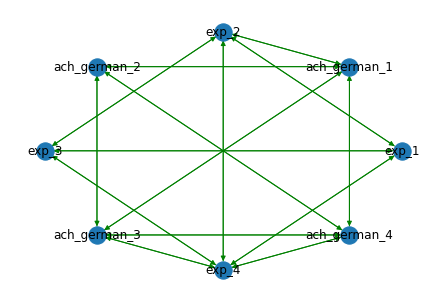

In [ ]:
# visualization using nx
cg_german.to_nx_graph()
cg_german.draw_nx_graph(skel=False)

Plot German data with background knowledge

Green: undirected; Blue: directed; Red: bi-directed



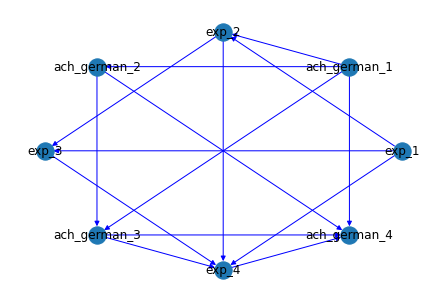

In [ ]:
cg_german_with_background_knowledge.to_nx_graph()
cg_german_with_background_knowledge.draw_nx_graph(skel=False)

PC algorithm on math Data

In [ ]:
cg_math = pc(math_data, 0.01, fisherz, True, 0, 0)


  0%|          | 0/8 [00:00<?, ?it/s]

Forbid directed edges from going back in time

In [ ]:
nodes = cg_math.G.get_nodes()
forbids = [(nodes[2], nodes[0]),(nodes[2], nodes[1]),(nodes[3], nodes[0]),(nodes[3], nodes[1]),
           (nodes[4], nodes[0]),(nodes[4], nodes[1]),(nodes[4], nodes[2]),(nodes[4], nodes[3]),
           (nodes[5], nodes[0]),(nodes[5], nodes[1]),(nodes[5], nodes[2]),(nodes[5], nodes[3]),
           (nodes[6], nodes[0]),(nodes[6], nodes[1]),(nodes[6], nodes[2]),(nodes[6], nodes[3]),(nodes[6], nodes[4]),(nodes[6], nodes[5]),
           (nodes[7], nodes[0]),(nodes[7], nodes[1]),(nodes[7], nodes[2]),(nodes[7], nodes[3]),(nodes[7], nodes[4]),(nodes[7], nodes[5])]
bk = BackgroundKnowledge()
for node_pair in forbids:
       bk = bk.add_forbidden_by_node(*node_pair)

In [ ]:
# visualization using pydot
###cg_math.draw_pydot_graph()

PC Algorithm with background knowledge on math data

In [ ]:
#assert cg_math.G.get_edge(nodes[2], nodes[1])

cg_math_with_background_knowledge = pc(math_data, 0.01, fisherz, True, 0, 0,  background_knowledge=bk)

#assert not cg_math_with_background_knowledge.G.is_directed_from_to(nodes[2], nodes[1])

  0%|          | 0/8 [00:00<?, ?it/s]

Rename features for clearer understanding

In [ ]:
mathlabels={0: 'exp_1', 1: 'ach_maths_1', 2: 'exp_2', 3: 'ach_maths_2', 4: 'exp_3', 5: 'ach_maths_3', 6: 'exp_4', 7: 'ach_maths_4'}


nodes = range(len(cg_math_with_background_knowledge.G.graph))
{i: cg_math_with_background_knowledge.G.nodes[i].set_name(mathlabels[i]) for i in nodes}


nodes = range(len(cg_math.G.graph))
{i: cg_math.G.nodes[i].set_name(mathlabels[i]) for i in nodes}

{0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None}

Math data plotting

Green: undirected; Blue: directed; Red: bi-directed



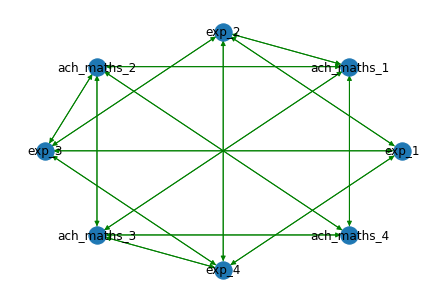

In [ ]:
# visualization using nx
cg_math.to_nx_graph()
cg_math.draw_nx_graph(skel=False)

Math data with backgroung knowledge plotting

Green: undirected; Blue: directed; Red: bi-directed



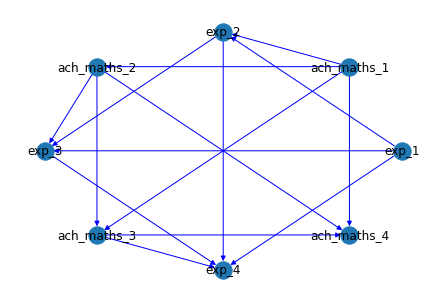

In [ ]:
cg_math_with_background_knowledge.to_nx_graph()
cg_math_with_background_knowledge.draw_nx_graph(skel=False)

# Section 3 - Full data Preprocessing 

If data is provided, this whole section should be skipped

In [ ]:
data=pd.read_csv(open('/content/drive/My Drive/preprocessed.csv', 'r'))
df = data.iloc[: , 1:]

Or this if not using Drive

In [ ]:
data=pd.read_csv(open('preprocessed.csv', 'r'))
df = data.iloc[: , 1:]

keep first of all similar student IDs

In [ ]:
df_first=df.iloc[df['ID_t'].drop_duplicates().index]
df_first['w3_critical_thinking'] = df_first[['critical_thinking_german_w3','critical_thinking_math_w3']].mean(axis=1)
df_first.drop("critical_thinking_german_w3", axis=1, inplace=True)
df_first.drop("critical_thinking_math_w3", axis=1, inplace=True)
df_first['w5_critical_thinking'] = df_first[['critical_thinking_german_w5','critical_thinking_math_w5']].mean(axis=1)
df_first.drop("critical_thinking_german_w5", axis=1, inplace=True)
df_first.drop("critical_thinking_math_w5", axis=1, inplace=True)
df_first['w3_individualized_education'] = df_first[['individualized_education_german_w3','individualized_education_math_w3']].mean(axis=1)
df_first.drop("individualized_education_german_w3", axis=1, inplace=True)
df_first.drop("individualized_education_math_w3", axis=1, inplace=True)
df_first['w5_individualized_education'] = df_first[['individualized_education_german_w5','individualized_education_math_w5']].mean(axis=1)
df_first.drop("individualized_education_german_w5", axis=1, inplace=True)
df_first.drop("individualized_education_math_w5", axis=1, inplace=True)
df_first['w3_practical_edu'] = df_first[['practical_edu_german_w3','practical_edu_math_w3']].mean(axis=1)
df_first.drop("practical_edu_german_w3", axis=1, inplace=True)
df_first.drop("practical_edu_math_w3", axis=1, inplace=True)
df_first['w5_practical_edu'] = df_first[['practical_edu_german_w5','practical_edu_math_w5']].mean(axis=1)
df_first.drop("practical_edu_german_w5", axis=1, inplace=True)
df_first.drop("practical_edu_math_w5", axis=1, inplace=True)
df_first['w3_work_individually'] = df_first[['work_individually_german_w3','work_individually_math_w3']].mean(axis=1)
df_first.drop("work_individually_german_w3", axis=1, inplace=True)
df_first.drop("work_individually_math_w3", axis=1, inplace=True)
df_first['w5_work_individually'] = df_first[['work_individually_german_w5','work_individually_math_w5']].mean(axis=1)
df_first.drop("work_individually_german_w5", axis=1, inplace=True)
df_first.drop("work_individually_math_w5", axis=1, inplace=True)
df_first['w3_no_lessons'] = df_first[['no_lessons_german_w3','no_lessons_math_w3']].mean(axis=1)
df_first.drop("no_lessons_german_w3", axis=1, inplace=True)
df_first.drop("no_lessons_math_w3", axis=1, inplace=True)
df_first['w5_no_lessons'] = df_first[['no_lessons_german_w5','no_lessons_math_w5']].mean(axis=1)
df_first.drop("no_lessons_german_w5", axis=1, inplace=True)
df_first.drop("no_lessons_math_w5", axis=1, inplace=True)
df_first.drop("ID_t", axis=1, inplace=True)
df_first.drop("ID_cc", axis=1, inplace=True)
df_first.drop("ID_cg", axis=1, inplace=True)
df_first.drop("ID_cm", axis=1, inplace=True)
df_first.drop("ID_e", axis=1, inplace=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Export to Drive

In [ ]:
df_first.to_csv('/content/drive/My Drive/AIED_first_data.csv')

Average values of all similar student Ids

In [ ]:
df_avg=df.copy()
df_avg.drop("ID_cc", axis=1, inplace=True)
df_avg.drop("ID_cg", axis=1, inplace=True)
df_avg.drop("ID_cm", axis=1, inplace=True)
df_avg.drop("ID_e", axis=1, inplace=True)
indicators = ['ID_t']

groups = (~df_avg.duplicated(subset=indicators)).cumsum()
agg_dict = {k: 'mean' for k in df_avg.columns[1:]}
df_avg=df_avg.groupby(groups).agg(agg_dict)
df_avg['w3_critical_thinking'] = df_avg[['critical_thinking_german_w3','critical_thinking_math_w3']].mean(axis=1)
df_avg.drop("critical_thinking_german_w3", axis=1, inplace=True)
df_avg.drop("critical_thinking_math_w3", axis=1, inplace=True)
df_avg['w5_critical_thinking'] = df_avg[['critical_thinking_german_w5','critical_thinking_math_w5']].mean(axis=1)
df_avg.drop("critical_thinking_german_w5", axis=1, inplace=True)
df_avg.drop("critical_thinking_math_w5", axis=1, inplace=True)
df_avg['w3_individualized_education'] = df_avg[['individualized_education_german_w3','individualized_education_math_w3']].mean(axis=1)
df_avg.drop("individualized_education_german_w3", axis=1, inplace=True)
df_avg.drop("individualized_education_math_w3", axis=1, inplace=True)
df_avg['w5_individualized_education'] = df_avg[['individualized_education_german_w5','individualized_education_math_w5']].mean(axis=1)
df_avg.drop("individualized_education_german_w5", axis=1, inplace=True)
df_avg.drop("individualized_education_math_w5", axis=1, inplace=True)
df_avg['w3_practical_edu'] = df_avg[['practical_edu_german_w3','practical_edu_math_w3']].mean(axis=1)
df_avg.drop("practical_edu_german_w3", axis=1, inplace=True)
df_avg.drop("practical_edu_math_w3", axis=1, inplace=True)
df_avg['w5_practical_edu'] = df_avg[['practical_edu_german_w5','practical_edu_math_w5']].mean(axis=1)
df_avg.drop("practical_edu_german_w5", axis=1, inplace=True)
df_avg.drop("practical_edu_math_w5", axis=1, inplace=True)
df_avg['w3_work_individually'] = df_avg[['work_individually_german_w3','work_individually_math_w3']].mean(axis=1)
df_avg.drop("work_individually_german_w3", axis=1, inplace=True)
df_avg.drop("work_individually_math_w3", axis=1, inplace=True)
df_avg['w5_work_individually'] = df_avg[['work_individually_german_w5','work_individually_math_w5']].mean(axis=1)
df_avg.drop("work_individually_german_w5", axis=1, inplace=True)
df_avg.drop("work_individually_math_w5", axis=1, inplace=True)
df_avg['w3_no_lessons'] = df_avg[['no_lessons_german_w3','no_lessons_math_w3']].mean(axis=1)
df_avg.drop("no_lessons_german_w3", axis=1, inplace=True)
df_avg.drop("no_lessons_math_w3", axis=1, inplace=True)
df_avg['w5_no_lessons'] = df_avg[['no_lessons_german_w5','no_lessons_math_w5']].mean(axis=1)
df_avg.drop("no_lessons_german_w5", axis=1, inplace=True)
df_avg.drop("no_lessons_math_w5", axis=1, inplace=True)

Export to Drive

In [ ]:
df_avg.to_csv('/content/drive/My Drive/AIED_avg_data.csv')

Keep student as it is but average german and math like the 2 other methods

In [ ]:
df_full=df.copy()
df_full['w3_critical_thinking'] = df_full[['critical_thinking_german_w3','critical_thinking_math_w3']].mean(axis=1)
df_full.drop("critical_thinking_german_w3", axis=1, inplace=True)
df_full.drop("critical_thinking_math_w3", axis=1, inplace=True)
df_full['w5_critical_thinking'] = df_full[['critical_thinking_german_w5','critical_thinking_math_w5']].mean(axis=1)
df_full.drop("critical_thinking_german_w5", axis=1, inplace=True)
df_full.drop("critical_thinking_math_w5", axis=1, inplace=True)
df_full['w3_individualized_education'] = df_full[['individualized_education_german_w3','individualized_education_math_w3']].mean(axis=1)
df_full.drop("individualized_education_german_w3", axis=1, inplace=True)
df_full.drop("individualized_education_math_w3", axis=1, inplace=True)
df_full['w5_individualized_education'] = df_full[['individualized_education_german_w5','individualized_education_math_w5']].mean(axis=1)
df_full.drop("individualized_education_german_w5", axis=1, inplace=True)
df_full.drop("individualized_education_math_w5", axis=1, inplace=True)
df_full['w3_practical_edu'] = df_full[['practical_edu_german_w3','practical_edu_math_w3']].mean(axis=1)
df_full.drop("practical_edu_german_w3", axis=1, inplace=True)
df_full.drop("practical_edu_math_w3", axis=1, inplace=True)
df_full['w5_practical_edu'] = df_full[['practical_edu_german_w5','practical_edu_math_w5']].mean(axis=1)
df_full.drop("practical_edu_german_w5", axis=1, inplace=True)
df_full.drop("practical_edu_math_w5", axis=1, inplace=True)
df_full['w3_work_individually'] = df_full[['work_individually_german_w3','work_individually_math_w3']].mean(axis=1)
df_full.drop("work_individually_german_w3", axis=1, inplace=True)
df_full.drop("work_individually_math_w3", axis=1, inplace=True)
df_full['w5_work_individually'] = df_full[['work_individually_german_w5','work_individually_math_w5']].mean(axis=1)
df_full.drop("work_individually_german_w5", axis=1, inplace=True)
df_full.drop("work_individually_math_w5", axis=1, inplace=True)
df_full['w3_no_lessons'] = df_full[['no_lessons_german_w3','no_lessons_math_w3']].mean(axis=1)
df_full.drop("no_lessons_german_w3", axis=1, inplace=True)
df_full.drop("no_lessons_math_w3", axis=1, inplace=True)
df_full['w5_no_lessons'] = df_full[['no_lessons_german_w5','no_lessons_math_w5']].mean(axis=1)
df_full.drop("no_lessons_german_w5", axis=1, inplace=True)
df_full.drop("no_lessons_math_w5", axis=1, inplace=True)
df_full.drop("ID_t", axis=1, inplace=True)
df_full.drop("ID_cc", axis=1, inplace=True)
df_full.drop("ID_cg", axis=1, inplace=True)
df_full.drop("ID_cm", axis=1, inplace=True)
df_full.drop("ID_e", axis=1, inplace=True)

Export to drive

In [ ]:
df_full.to_csv('/content/drive/My Drive/AIED_full_data.csv')

NameError: ignored

# Section 4 - PC algorithm on all variables

Prepare labels

In [ ]:
data=pd.read_csv(open('/content/drive/My Drive/AIED_full_data.csv', 'r'))
df = data.iloc[: , 1:]
full_labels={}
for k in range(len(df.columns)):
  full_labels.update({k: df.columns[k]})
print(full_labels)

{0: 'Achievements_w3', 1: 'Achievements_w5', 2: 'Class diversified environment_w3', 3: 'Class diversified environment_w5', 4: 'class_positive_environment_w3', 5: 'class_positive_environment_w5', 6: 'classroom_quality_w3', 7: 'classroom_quality_w5', 8: 'comfort', 9: 'critical_thinking_teacher', 10: 'curiosity', 11: 'expectations_w3', 12: 'expectations_w5', 13: 'experience_teacher', 14: 'highest_leaving_school_quali_parents', 15: 'highest_prof_quali_parents', 16: 'immigrant_background', 17: 'implication_parents', 18: 'implication_teachers_w3', 19: 'implication_teachers_w5', 20: 'mental_health', 21: 'mental_health_perception', 22: 'migrant_background_teacher', 23: 'money', 24: 'motivation', 25: 'motivation_teacher', 26: 'no_students_w3', 27: 'no_students_w5', 28: 'preassure_put', 29: 'resources', 30: 'teacher_quality', 31: 'teacher_skills', 32: 'wished_profession', 33: 'w3_critical_thinking', 34: 'w5_critical_thinking', 35: 'w3_individualized_education', 36: 'w5_individualized_education',

Get all data from drive

In [ ]:
avg_data = np.genfromtxt(open('/content/drive/My Drive/AIED_avg_data.csv', 'r'), delimiter=',', skip_header=1)
avg_data=avg_data[:,1:]
print(avg_data.shape)
first_data = np.genfromtxt(open('/content/drive/My Drive/AIED_first_data.csv', 'r'), delimiter=',', skip_header=1)
first_data=first_data[:,1:]
print(first_data.shape)
full_data = np.genfromtxt(open('/content/drive/My Drive/AIED_full_data.csv', 'r'), delimiter=',', skip_header=1)
full_data=full_data[:,1:]
print(full_data.shape)

(3617, 43)
(3617, 43)
(7679, 43)


Get data from import

In [6]:
avg_data = np.genfromtxt('AIED_avg_data.csv', delimiter=',', skip_header=1)
avg_data=avg_data[:,1:]
print(avg_data.shape)
first_data = np.genfromtxt('AIED_first_data.csv', delimiter=',', skip_header=1)
first_data=first_data[:,1:]
print(first_data.shape)
full_data = np.genfromtxt('AIED_full_data.csv', delimiter=',', skip_header=1)
full_data=full_data[:,1:]
print(full_data.shape)

(3617, 43)
(3617, 43)
(7679, 43)


After careful analisis of graph with different UC parameters and different databases, use 0.01 p_value, fisherz idependance test, uc_sepset, and prioritze existing colliders, with average student of same ID dataset

In [ ]:
cg_avg = pc(avg_data, 0.01, fisherz, True, 0, 2)

  0%|          | 0/43 [00:00<?, ?it/s]

Create background knowledge of nodes that cannot go back in past and previous analisis of expectation not impacting Achievements

In [ ]:
nodes = cg_avg.G.get_nodes()
forbids = [(nodes[1], nodes[0]),(nodes[1], nodes[2]),(nodes[1], nodes[4]),(nodes[1], nodes[6]),(nodes[1], nodes[11]),(nodes[1], nodes[18]),
           (nodes[1], nodes[26]),(nodes[1], nodes[33]),(nodes[1], nodes[35]),(nodes[1], nodes[37]),(nodes[1], nodes[39]),(nodes[1], nodes[41]),
           (nodes[3], nodes[0]),(nodes[3], nodes[2]),(nodes[3], nodes[4]),(nodes[3], nodes[6]),(nodes[3], nodes[11]),(nodes[3], nodes[18]),
           (nodes[3], nodes[26]),(nodes[3], nodes[33]),(nodes[3], nodes[35]),(nodes[3], nodes[37]),(nodes[3], nodes[39]),(nodes[3], nodes[41]),
           (nodes[5], nodes[0]),(nodes[5], nodes[2]),(nodes[5], nodes[4]),(nodes[5], nodes[6]),(nodes[5], nodes[11]),(nodes[5], nodes[18]),
           (nodes[5], nodes[26]),(nodes[5], nodes[33]),(nodes[5], nodes[35]),(nodes[5], nodes[37]),(nodes[5], nodes[39]),(nodes[5], nodes[41]),
           (nodes[7], nodes[0]),(nodes[7], nodes[2]),(nodes[7], nodes[4]),(nodes[7], nodes[6]),(nodes[7], nodes[11]),(nodes[7], nodes[18]),
           (nodes[7], nodes[26]),(nodes[7], nodes[33]),(nodes[7], nodes[35]),(nodes[7], nodes[37]),(nodes[7], nodes[39]),(nodes[7], nodes[41]),
           (nodes[11],nodes[0]),(nodes[11],nodes[1]),(nodes[12], nodes[0]),(nodes[12],nodes[1]),(nodes[12], nodes[2]),(nodes[12], nodes[4]),(nodes[12], nodes[6]),(nodes[12], nodes[11]),(nodes[12], nodes[18]),
           (nodes[12], nodes[26]),(nodes[12], nodes[33]),(nodes[12], nodes[35]),(nodes[12], nodes[37]),(nodes[12], nodes[39]),(nodes[12], nodes[41]),
           (nodes[19], nodes[0]),(nodes[19], nodes[2]),(nodes[19], nodes[4]),(nodes[19], nodes[6]),(nodes[19], nodes[11]),(nodes[19], nodes[18]),
           (nodes[19], nodes[26]),(nodes[19], nodes[33]),(nodes[19], nodes[35]),(nodes[19], nodes[37]),(nodes[19], nodes[39]),(nodes[19], nodes[41]),
           (nodes[27], nodes[0]),(nodes[27], nodes[2]),(nodes[27], nodes[4]),(nodes[27], nodes[6]),(nodes[27], nodes[11]),(nodes[27], nodes[18]),
           (nodes[27], nodes[26]),(nodes[27], nodes[33]),(nodes[27], nodes[35]),(nodes[27], nodes[37]),(nodes[27], nodes[39]),(nodes[27], nodes[41]),
           (nodes[34], nodes[0]),(nodes[34], nodes[2]),(nodes[34], nodes[4]),(nodes[34], nodes[6]),(nodes[34], nodes[11]),(nodes[34], nodes[18]),
           (nodes[34], nodes[26]),(nodes[34], nodes[33]),(nodes[34], nodes[35]),(nodes[34], nodes[37]),(nodes[34], nodes[39]),(nodes[34], nodes[41]),
           (nodes[36], nodes[0]),(nodes[36], nodes[2]),(nodes[36], nodes[4]),(nodes[36], nodes[6]),(nodes[36], nodes[11]),(nodes[36], nodes[18]),
           (nodes[36], nodes[26]),(nodes[36], nodes[33]),(nodes[36], nodes[35]),(nodes[36], nodes[37]),(nodes[36], nodes[39]),(nodes[36], nodes[41]),
           (nodes[38], nodes[0]),(nodes[38], nodes[2]),(nodes[38], nodes[4]),(nodes[38], nodes[6]),(nodes[38], nodes[11]),(nodes[38], nodes[18]),
           (nodes[38], nodes[26]),(nodes[38], nodes[33]),(nodes[38], nodes[35]),(nodes[38], nodes[37]),(nodes[38], nodes[39]),(nodes[38], nodes[41]),
           (nodes[40], nodes[0]),(nodes[40], nodes[2]),(nodes[40], nodes[4]),(nodes[40], nodes[6]),(nodes[40], nodes[11]),(nodes[40], nodes[18]),
           (nodes[40], nodes[26]),(nodes[40], nodes[33]),(nodes[40], nodes[35]),(nodes[40], nodes[37]),(nodes[40], nodes[39]),(nodes[40], nodes[41]),
           (nodes[42], nodes[0]),(nodes[42], nodes[2]),(nodes[42], nodes[4]),(nodes[42], nodes[6]),(nodes[42], nodes[11]),(nodes[42], nodes[18]),
           (nodes[42], nodes[26]),(nodes[42], nodes[33]),(nodes[42], nodes[35]),(nodes[42], nodes[37]),(nodes[42], nodes[39]),(nodes[42], nodes[41])]
bk = BackgroundKnowledge()
for node_pair in forbids:
       bk = bk.add_forbidden_by_node(*node_pair)

Run PC algorithm with background knowledge

In [ ]:
cg_avg_with_bk = pc(avg_data, 0.01, fisherz, True, 0, 2, background_knowledge=bk)

  0%|          | 0/43 [00:00<?, ?it/s]

Change node names for clearer understanding

In [ ]:
nodes = range(len(cg_avg.G.graph))
{i: cg_avg.G.nodes[i].set_name(full_labels[i]) for i in nodes}
print(cg_avg.G.nodes)

nodes = range(len(cg_avg_with_bk.G.graph))
{i: cg_avg_with_bk.G.nodes[i].set_name(full_labels[i]) for i in nodes}
print(cg_avg_with_bk.G.nodes)

[<causallearn.graph.GraphNode.GraphNode object at 0x7ffb292ab150>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292ab910>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292ab090>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292ab0d0>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abc50>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abcd0>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abd10>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abd50>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abd90>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292ab050>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abe10>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abdd0>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abe90>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abe50>, <causallearn.graph.GraphNode.GraphNode object at 0x7ffb292abed0>, <causalle

Import plots to change the figure size for more clarity of results

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Plot without background knowledge

Green: undirected; Blue: directed; Red: bi-directed



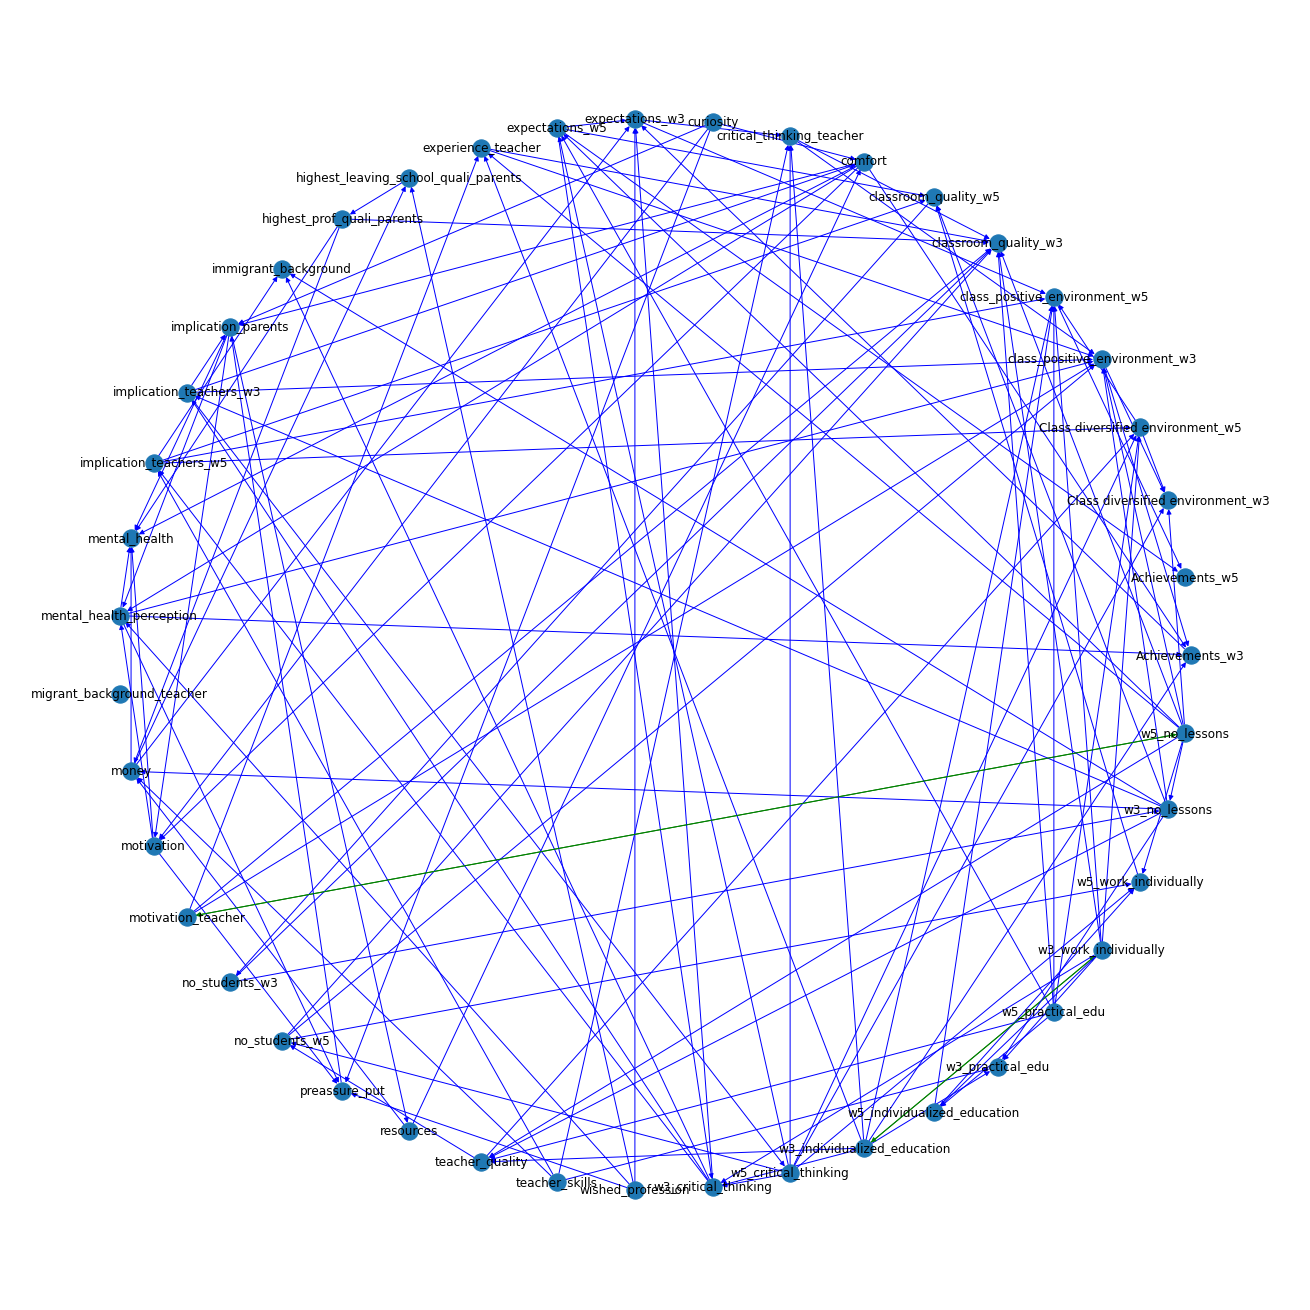

In [ ]:
# visualization using nx
cg_avg.to_nx_graph()
plt.figure(3,figsize=(18,18)) 
cg_avg.draw_nx_graph(skel=False)

Plot with background knowledge

Green: undirected; Blue: directed; Red: bi-directed



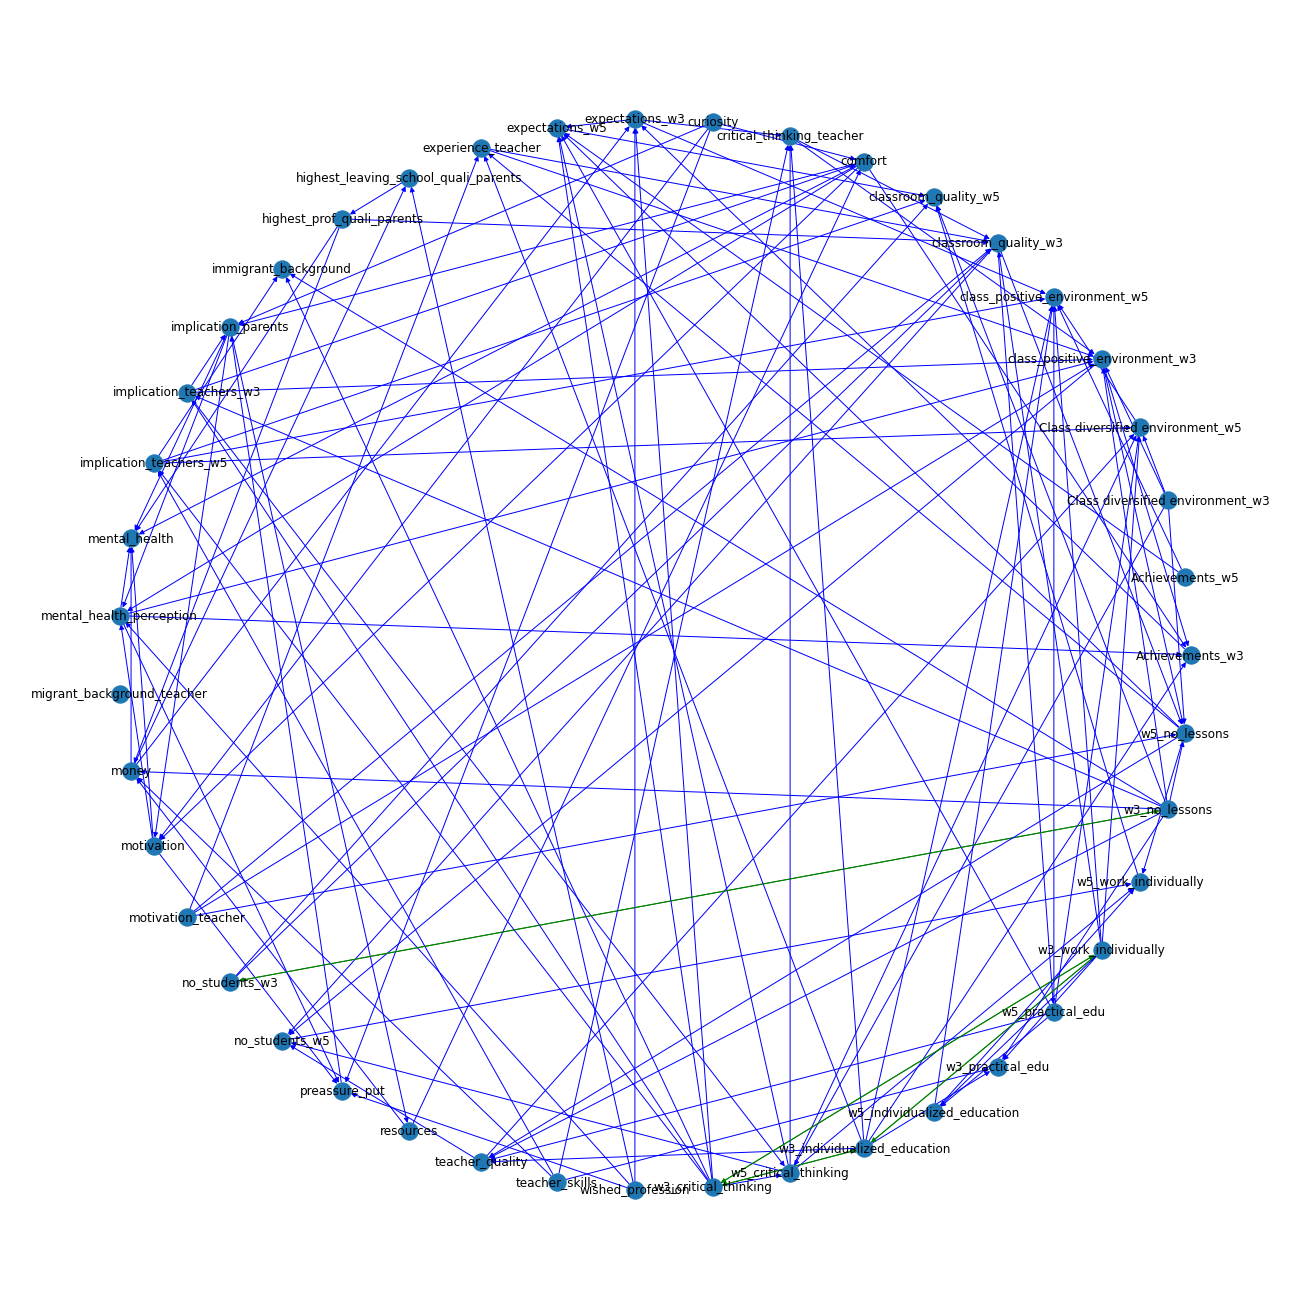

In [ ]:
# visualization using nx
cg_avg_with_bk.to_nx_graph()
plt.figure(3,figsize=(18,18)) 
cg_avg_with_bk.draw_nx_graph(skel=False)

# Section 5 - Modifications of 3 lines of original package Causal-Learn, FCI class  

In order to avoid errors when using FCI package of causal-lean with background knowledge which happened because of 3 printing lines that did not Str the object, the whole class was copied. The following code is not ours and aknowledge the source coming from [Causal learn FCI github](https://github.com/cmu-phil/causal-learn/blob/main/causallearn/search/ConstraintBased/FCI.py). We simply removed 3 lines in order to make the code work with background knowledge.

In [ ]:
##The following code is not ours and belongs to https://github.com/cmu-phil/causal-learn/blob/main/causallearn/search/ConstraintBased/FCI.py
import warnings
from queue import Queue

import numpy as np

from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.GraphNode import GraphNode
from causallearn.utils.ChoiceGenerator import ChoiceGenerator
from causallearn.utils.cit import *
from causallearn.utils.Fas import citest_cache, fas
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge


class SepsetsPossibleDsep():
    def __init__(self, data, graph, independence_test, alpha, knowledge, depth, maxPathLength, verbose,
                 cache_variables_map=None):

        def _unique(column):
            return np.unique(column, return_inverse=True)[1]

        if independence_test == chisq or independence_test == gsq:
            data = np.apply_along_axis(_unique, 0, data).astype(np.int64)

        self.data = data
        self.graph = graph
        self.independence_test = independence_test
        self.alpha = alpha
        self.knowledge = knowledge
        self.depth = depth
        self.maxPathLength = maxPathLength
        self.verbose = verbose

        if cache_variables_map is None:
            if independence_test == chisq or independence_test == gsq:
                cardinalities = np.max(data, axis=0) + 1
            else:
                cardinalities = None
            cache_variables_map = {"data_hash_key": hash(str(data)),
                                   "ci_test_hash_key": hash(independence_test),
                                   "cardinalities": cardinalities}

        self.data_hash_key = cache_variables_map["data_hash_key"]
        self.ci_test_hash_key = cache_variables_map["ci_test_hash_key"]
        self.cardinalities = cache_variables_map["cardinalities"]

    def traverseSemiDirected(self, node, edge):
        if node == edge.get_node1():
            if edge.get_endpoint1() == Endpoint.TAIL or edge.get_endpoint1() == Endpoint.CIRCLE:
                return edge.get_node2()
        elif node == edge.get_node2():
            if edge.get_endpoint2() == Endpoint.TAIL or edge.get_endpoint2() == Endpoint.CIRCLE:
                return edge.get_node1()
        return None

    def existsSemidirectedPath(self, node_from, node_to, G):
        Q = Queue()
        V = set()
        Q.put(node_from)
        V.add(node_from)

        while not Q.empty():
            node_t = Q.get_nowait()
            if node_t == node_to:
                return True

            for node_u in G.get_adjacent_nodes(node_t):
                edge = G.get_edge(node_t, node_u)
                node_c = self.traverseSemiDirected(node_t, edge)

                if node_c is None:
                    continue

                if V.__contains__(node_c):
                    continue

                V.add(node_c)
                Q.put(node_c)

        return False

    def existOnePathWithPossibleParents(self, previous, node_w, node_x, node_b, graph):
        if node_w == node_x:
            return True
        p = previous.get(node_w)
        if p is None:
            return False
        for node_r in p:
            if node_r == node_b or node_r == node_x:
                continue

            if self.existsSemidirectedPath(node_r, node_x, graph) or self.existsSemidirectedPath(node_r, node_b, graph):
                if self.existOnePathWithPossibleParents(previous, node_r, node_x, node_b, graph):
                    return True
        return False

    def getPossibleDsep(self, node_x, node_y, maxPathLength):
        dsep = set()
        Q = Queue()
        V = set()
        previous = {node_x: None}
        e = None
        distance = 0

        for node_b in self.graph.get_adjacent_nodes(node_x):
            if node_b == node_y:
                continue
            edge = (node_x, node_b)
            if e is None:
                e = edge
            Q.put(edge)
            V.add(edge)

            # addToList
            node_list = previous.get(node_x)
            if node_list is None:
                node_list = []
            node_list.append(node_b)
            # previous[node_x] = node_list
            dsep.add(node_b)

        while not Q.empty():
            t = Q.get_nowait()
            if e == t:
                e = None
                distance += 1
                if distance > 0 and distance > (1000 if maxPathLength == -1 else maxPathLength):
                    break
            node_a, node_b = t

            if self.existOnePathWithPossibleParents(previous, node_b, node_x, node_b, self.graph):
                dsep.add(node_b)

            for node_c in self.graph.get_adjacent_nodes(node_b):
                if node_c == node_a:
                    continue
                if node_c == node_x:
                    continue
                if node_c == node_y:
                    continue

                # addToList
                node_list = previous.get(node_c)
                if node_list is None:
                    node_list = []
                node_list.append(node_b)
                # previous[node_c] = node_list

                # isDefCollider
                edge1 = self.graph.get_edge(node_a, node_b)
                edge2 = self.graph.get_edge(node_b, node_c)
                isDefCollider = not (edge1 is None or edge2 is None) and \
                                edge1.get_proximal_endpoint(node_b) == Endpoint.ARROW and \
                                edge2.get_proximal_endpoint(node_b) == Endpoint.ARROW

                if isDefCollider or self.graph.is_adjacent_to(node_a, node_c):
                    u = (node_a, node_c)
                    if V.__contains__(u):
                        continue

                    V.add(u)
                    Q.put(u)

                    if e is None:
                        e = u

        if dsep.__contains__(node_x):
            dsep.remove(node_x)
        if dsep.__contains__(node_y):
            dsep.remove(node_y)

        if self.verbose:
            message = "Possible-D-Sep(" + node_x.get_name() + ", " + node_y.get_name() + ") = [ "
            for dsep_node in dsep:
                message += dsep_node.get_name() + " "
            message += "]"
            print(message)

        return dsep

    def possibleParentOf(self, node_z, node_x, bk):
        return True if bk is None else not (bk.is_forbidden(node_z, node_x) or bk.is_required(node_x, node_z))

    def possibleParents(self, node_x, nodes, knowledge):
        possibleParents = list()
        for node_z in nodes:
            if self.possibleParentOf(node_z, node_x, knowledge):
                possibleParents.append(node_z)
        return possibleParents

    def get_cond_set(self, node_1, node_2, max_path_length):
        possibleDsepSet = self.getPossibleDsep(node_1, node_2, max_path_length)
        possibleDsep = list(possibleDsepSet)
        noEdgeRequired = True if self.knowledge is None else not \
            (self.knowledge.is_required(node_1, node_2) or self.knowledge.is_required(node_2, node_1))

        possParents = self.possibleParents(node_1, possibleDsep, self.knowledge)

        _depth = 1000 if self.depth == -1 else self.depth

        possible_sep_set = set()

        for d in range(1 + min(_depth, len(possParents))):
            cg = ChoiceGenerator(len(possParents), d)
            choice = cg.next()
            flag = False
            while choice is not None:
                condSet = [self.graph.node_map[possParents[index]] for index in choice]
                choice = cg.next()

                X, Y = self.graph.node_map[node_1], self.graph.node_map[node_2]
                X, Y = (X, Y) if (X < Y) else (Y, X)
                XYS_key = (X, Y, frozenset(condSet), self.data_hash_key, self.ci_test_hash_key)
                if XYS_key in citest_cache:
                    p_value = citest_cache[XYS_key]
                else:
                    p_value = self.independence_test(self.data, X, Y, tuple(condSet)) if self.cardinalities is None \
                        else self.independence_test(self.data, X, Y, tuple(condSet), self.cardinalities)

                    citest_cache[XYS_key] = p_value
                independent = p_value > self.alpha

                if independent and noEdgeRequired:
                    for item in condSet:
                        possible_sep_set.add(item)
                    flag = True
            if flag:
                return possible_sep_set
        return None

    def get_sep_set(self, node_i, node_k):
        condSet = self.get_cond_set(node_i, node_k, self.maxPathLength)
        if condSet is None:
            condSet = self.get_cond_set(node_k, node_i, self.maxPathLength)
        return condSet


def fci_orient_bk(bk, graph):
    if bk is None:
        return
    print("Starting BK Orientation.")
    edges = graph.get_graph_edges()
    for edge in edges:
        if bk.is_forbidden(edge.get_node1(), edge.get_node2()):
            graph.remove_edge(edge)
            graph.add_directed_edge(edge.get_node2(), edge.get_node1())
            #print("Orienting edge (Knowledge): " + graph.get_edge(edge.get_node2(), edge.get_node1()))
        elif bk.is_forbidden(edge.get_node2(), edge.get_node1()):
            graph.remove_edge(edge)
            graph.add_directed_edge(edge.get_node1(), edge.get_node2())
            #print("Orienting edge (Knowledge): " + graph.get_edge(edge.get_node2(), edge.get_node1()))
        elif bk.is_required(edge.get_node1(), edge.get_node2()):
            graph.remove_edge(edge)
            graph.add_directed_edge(edge.get_node1(), edge.get_node2())
            #print("Orienting edge (Knowledge): " + graph.get_edge(edge.get_node2(), edge.get_node1()))
        elif bk.is_required(edge.get_node2(), edge.get_node1()):
            graph.remove_edge(edge)
            graph.add_directed_edge(edge.get_node2(), edge.get_node1())
            #print("Orienting edge (Knowledge): " + graph.get_edge(edge.get_node2(), edge.get_node1()))
    print("Finishing BK Orientation.")


def is_arrow_point_allowed(node_x, node_y, graph, knowledge):
    if graph.get_endpoint(node_x, node_y) == Endpoint.ARROW:
        return True
    if graph.get_endpoint(node_x, node_y) == Endpoint.TAIL:
        return False
    if graph.get_endpoint(node_y, node_x) == Endpoint.ARROW:
        if knowledge is not None and not knowledge.is_forbidden(node_x, node_y):
            return True
    if graph.get_endpoint(node_y, node_x) == Endpoint.TAIL:
        if knowledge is not None and not knowledge.is_forbidden(node_x, node_y):
            return True
    return graph.get_endpoint(node_x, node_y) == Endpoint.CIRCLE


def rule0(graph, nodes, sep_sets, knowledge, verbose):
    reorientAllWith(graph, Endpoint.CIRCLE)
    fci_orient_bk(knowledge, graph)
    for node_b in nodes:
        adjacent_nodes = graph.get_adjacent_nodes(node_b)
        if len(adjacent_nodes) < 2:
            continue

        cg = ChoiceGenerator(len(adjacent_nodes), 2)
        combination = cg.next()
        while combination is not None:
            node_a = adjacent_nodes[combination[0]]
            node_c = adjacent_nodes[combination[1]]
            combination = cg.next()

            if graph.is_adjacent_to(node_a, node_c):
                continue
            if graph.is_def_collider(node_a, node_b, node_c):
                continue
            # check if is collider
            sep_set = sep_sets.get((graph.node_map[node_a], graph.node_map[node_c]))
            if sep_set is not None and not sep_set.__contains__(graph.node_map[node_b]):
                if not is_arrow_point_allowed(node_a, node_b, graph, knowledge):
                    continue
                if not is_arrow_point_allowed(node_c, node_b, graph, knowledge):
                    continue

                edge1 = graph.get_edge(node_a, node_b)
                graph.remove_edge(edge1)
                graph.add_edge(Edge(node_a, node_b, edge1.get_proximal_endpoint(node_a), Endpoint.ARROW))

                edge2 = graph.get_edge(node_c, node_b)
                graph.remove_edge(edge2)
                graph.add_edge(Edge(node_c, node_b, edge2.get_proximal_endpoint(node_c), Endpoint.ARROW))

                if verbose:
                    print(
                        "Orienting collider: " + node_a.get_name() + " *-> " + node_b.get_name() + " <-* " + node_c.get_name())


def reorientAllWith(graph, endpoint):
    # reorient all edges with CIRCLE Endpoint
    ori_edges = graph.get_graph_edges()
    for ori_edge in ori_edges:
        graph.remove_edge(ori_edge)
        ori_edge.set_endpoint1(endpoint)
        ori_edge.set_endpoint2(endpoint)
        graph.add_edge(ori_edge)


def ruleR1(node_a, node_b, node_c, graph, bk, changeFlag, verbose=False):
    if graph.is_adjacent_to(node_a, node_c):
        return changeFlag

    if graph.get_endpoint(node_a, node_b) == Endpoint.ARROW and graph.get_endpoint(node_c, node_b) == Endpoint.CIRCLE:
        if not is_arrow_point_allowed(node_b, node_c, graph, bk):
            return changeFlag

        edge1 = graph.get_edge(node_c, node_b)
        graph.remove_edge(edge1)
        graph.add_edge(Edge(node_c, node_b, Endpoint.ARROW, Endpoint.TAIL))

        changeFlag = True

        if verbose:
            print("Orienting edge (Away from collider):" + graph.get_edge(node_b, node_c).__str__())

    return changeFlag


def ruleR2(node_a, node_b, node_c, graph, bk, changeFlag, verbose=False):
    if graph.is_adjacent_to(node_a, node_c) and graph.get_endpoint(node_a, node_c) == Endpoint.CIRCLE:
        if graph.get_endpoint(node_a, node_b) == Endpoint.ARROW and \
                graph.get_endpoint(node_b, node_c) == Endpoint.ARROW and \
                (graph.get_endpoint(node_b, node_a) == Endpoint.TAIL or
                 graph.get_endpoint(node_c, node_b) == Endpoint.TAIL):
            if not is_arrow_point_allowed(node_a, node_c, graph, bk):
                return changeFlag

            edge1 = graph.get_edge(node_a, node_c)
            graph.remove_edge(edge1)
            graph.add_edge(Edge(node_a, node_c, edge1.get_proximal_endpoint(node_a), Endpoint.ARROW))

            if verbose:
                print("Orienting edge (Away from ancestor): " + graph.get_edge(node_a, node_c).__str__())

            changeFlag = True

    return changeFlag


def rulesR1R2cycle(graph, bk, changeFlag, verbose=False):
    nodes = graph.get_nodes()
    for node_B in nodes:
        adj = graph.get_adjacent_nodes(node_B)

        if len(adj) < 2:
            continue

        cg = ChoiceGenerator(len(adj), 2)
        combination = cg.next()

        while combination is not None:
            node_A = adj[combination[0]]
            node_C = adj[combination[1]]
            combination = cg.next()

            changeFlag = ruleR1(node_A, node_B, node_C, graph, bk, changeFlag, verbose)
            changeFlag = ruleR1(node_C, node_B, node_A, graph, bk, changeFlag, verbose)
            changeFlag = ruleR2(node_A, node_B, node_C, graph, bk, changeFlag, verbose)
            changeFlag = ruleR2(node_C, node_B, node_A, graph, bk, changeFlag, verbose)

    return changeFlag


def isNoncollider(graph, sep_sets, node_i, node_j, node_k):
    sep_set = sep_sets[(graph.node_map[node_i], graph.node_map[node_k])]
    return sep_set is not None and sep_set.__contains__(graph.node_map[node_j])


def ruleR3(graph, sep_sets, bk, changeFlag, verbose=False):
    nodes = graph.get_nodes()
    for node_B in nodes:
        intoBArrows = graph.get_nodes_into(node_B, Endpoint.ARROW)
        intoBCircles = graph.get_nodes_into(node_B, Endpoint.CIRCLE)

        for node_D in intoBCircles:
            if len(intoBArrows) < 2:
                continue
            gen = ChoiceGenerator(len(intoBArrows), 2)
            choice = gen.next()

            while choice is not None:
                node_A = intoBArrows[choice[0]]
                node_C = intoBArrows[choice[1]]
                choice = gen.next()

                if graph.is_adjacent_to(node_A, node_C):
                    continue

                if not graph.is_adjacent_to(node_A, node_D) or graph.is_adjacent_to(node_C, node_D):
                    continue

                if not isNoncollider(graph, sep_sets, node_A, node_D, node_C):
                    continue

                if graph.get_endpoint(node_A, node_D) != Endpoint.CIRCLE:
                    continue

                if graph.get_endpoint(node_C, node_D) != Endpoint.CIRCLE:
                    continue

                if not is_arrow_point_allowed(node_D, node_B, graph, bk):
                    continue

                edge1 = graph.get_edge(node_D, node_B)
                graph.remove_edge(edge1)
                graph.add_edge(Edge(node_D, node_B, edge1.get_proximal_endpoint(node_D), Endpoint.ARROW))

                if verbose:
                    print("Orienting edge (Double triangle): " + graph.get_edge(node_D, node_B).__str__())

                changeFlag = True
    return changeFlag


def getPath(node_c, previous):
    l = []
    node_p = previous[node_c]
    if node_p is not None:
        l.append(node_p)
    while node_p is not None:
        node_p = previous.get(node_p)
        if node_p is not None:
            l.append(node_p)
    return l


def doDdpOrientation(node_d, node_a, node_b, node_c, previous, graph, data, independence_test_method, alpha, sep_sets,
                     changeFlag, bk, cache_variables_map, verbose=False):
    if graph.is_adjacent_to(node_d, node_c):
        raise Exception("illegal argument!")
    path = getPath(node_d, previous)

    X, Y = graph.node_map[node_d], graph.node_map[node_c]
    X, Y = (X, Y) if (X < Y) else (Y, X)
    condSet = tuple([graph.node_map[nn] for nn in path])

    data_hash_key = cache_variables_map["data_hash_key"]
    ci_test_hash_key = cache_variables_map["ci_test_hash_key"]
    cardinalities = cache_variables_map["cardinalities"]

    XYS_key = (X, Y, frozenset(condSet), data_hash_key, ci_test_hash_key)
    if XYS_key in citest_cache:
        p_value = citest_cache[XYS_key]
    else:
        p_value = independence_test_method(data, X, Y, condSet) if cardinalities is None \
            else independence_test_method(data, X, Y, condSet, cardinalities)

        citest_cache[XYS_key] = p_value
    ind = p_value > alpha

    path2 = list(path)
    path2.remove(node_b)

    X, Y = graph.node_map[node_d], graph.node_map[node_c]
    X, Y = (X, Y) if (X < Y) else (Y, X)
    condSet = tuple([graph.node_map[nn2] for nn2 in path2])
    XYS_key = (X, Y, frozenset(condSet), data_hash_key, ci_test_hash_key)
    if XYS_key in citest_cache:
        p_value2 = citest_cache[XYS_key]
    else:
        p_value2 = independence_test_method(data, X, Y, condSet) if cardinalities is None \
            else independence_test_method(data, X, Y, condSet, cardinalities)

        citest_cache[XYS_key] = p_value2
    ind2 = p_value2 > alpha

    if not ind and not ind2:
        sep_set = sep_sets.get((graph.node_map[node_d], graph.node_map[node_c]))
        if verbose:
            message = "Sepset for d = " + node_d.get_name() + " and c = " + node_c.get_name() + " = [ "
            if sep_set is not None:
                for ss in sep_set:
                    message += graph.nodes[ss].get_name() + " "
            message += "]"
            print(message)

        if sep_set is None:
            if verbose:
                print(
                    "Must be a sepset: " + node_d.get_name() + " and " + node_c.get_name() + "; they're non-adjacent.")
            return False, changeFlag

        ind = sep_set.__contains__(graph.node_map[node_b])

    if ind:
        edge = graph.get_edge(node_c, node_b)
        graph.remove_edge(edge)
        graph.add_edge(Edge(node_c, node_b, edge.get_proximal_endpoint(node_c), Endpoint.TAIL))

        if verbose:
            print(
                "Orienting edge (Definite discriminating path d = " + node_d.get_name() + "): " + graph.get_edge(node_b,
                                                                                                                 node_c).__str__())

        changeFlag = True
        return True, changeFlag
    else:
        if not is_arrow_point_allowed(node_a, node_b, graph, bk):
            return False, changeFlag

        if not is_arrow_point_allowed(node_c, node_b, graph, bk):
            return False, changeFlag

        edge1 = graph.get_edge(node_a, node_b)
        graph.remove_edge(edge1)
        graph.add_edge(Edge(node_a, node_b, edge1.get_proximal_endpoint(node_a), Endpoint.ARROW))

        edge2 = graph.get_edge(node_c, node_b)
        graph.remove_edge(edge2)
        graph.add_edge(Edge(node_c, node_b, edge2.get_proximal_endpoint(node_c), Endpoint.ARROW))

        if verbose:
            print(
                "Orienting collider (Definite discriminating path.. d = " + node_d.get_name() + "): " + node_a.get_name() + " *-> " + node_b.get_name() + " <-* " + node_c.get_name())

        changeFlag = True
        return True, changeFlag


def ddpOrient(node_a, node_b, node_c, graph, maxPathLength, data, independence_test_method, alpha, sep_sets, changeFlag,
              bk, cache_variables_map, verbose=False):
    Q = Queue()
    V = set()
    e = None
    distance = 0
    previous = {}

    cParents = graph.get_parents(node_c)

    Q.put(node_a)
    V.add(node_a)
    V.add(node_b)
    previous[node_a] = node_b

    while not Q.empty():
        node_t = Q.get_nowait()

        if e is None or e == node_t:
            e = node_t
            distance += 1
            if distance > 0 and distance > (1000 if maxPathLength == -1 else maxPathLength):
                return changeFlag

        nodesInTo = graph.get_nodes_into(node_t, Endpoint.ARROW)

        for node_d in nodesInTo:
            if V.__contains__(node_d):
                continue

            previous[node_d] = node_t
            node_p = previous[node_t]

            if not graph.is_def_collider(node_d, node_t, node_p):
                continue

            previous[node_d] = node_t

            if not graph.is_adjacent_to(node_d, node_c) and node_d != node_c:
                res, changeFlag = doDdpOrientation(node_d, node_a, node_b, node_c, previous, graph, data,
                                                   independence_test_method, alpha, sep_sets, changeFlag, bk,
                                                   cache_variables_map, verbose)

                if res:
                    return changeFlag

            if cParents.__contains__(node_d):
                Q.put(node_d)
                V.add(node_d)
    return changeFlag


def ruleR4B(graph, maxPathLength, data, independence_test_method, alpha, sep_sets, changeFlag, bk, cache_variables_map,
            verbose=False):
    nodes = graph.get_nodes()

    for node_b in nodes:
        possA = graph.get_nodes_out_of(node_b, Endpoint.ARROW)
        possC = graph.get_nodes_into(node_b, Endpoint.CIRCLE)

        for node_a in possA:
            for node_c in possC:
                if not graph.is_parent_of(node_a, node_c):
                    continue

                if graph.get_endpoint(node_b, node_c) != Endpoint.ARROW:
                    continue

                changeFlag = ddpOrient(node_a, node_b, node_c, graph, maxPathLength, data, independence_test_method,
                                       alpha, sep_sets, changeFlag, bk, cache_variables_map, verbose)
    return changeFlag


def traverseSemiDirected(node, edge):
    if node == edge.get_node1():
        if edge.get_endpoint1() == Endpoint.TAIL or edge.get_endpoint1() == Endpoint.CIRCLE:
            return edge.get_node2()
    elif node == edge.get_node2():
        if edge.get_endpoint2() == Endpoint.TAIL or edge.get_endpoint2() == Endpoint.CIRCLE:
            return edge.get_node1()
    return None


def existsSemiDirectedPath(node_from, node_to, bound, graph):
    Q = Queue()
    V = set()
    Q.put(node_from)
    V.add(node_from)
    node_e = None
    distance = 0

    while not Q.empty():
        node_t = Q.get_nowait()
        if node_t == node_to:
            return True

        if node_e == node_t:
            node_e = None
            distance += 1
            if distance > (1000 if bound == -1 else bound):
                return False

        for node_u in graph.get_adjacent_nodes(node_t):
            edge = graph.get_edge(node_t, node_u)
            node_c = traverseSemiDirected(node_t, edge)

            if node_c is None:
                continue

            if node_c == node_to:
                return True

            if not V.__contains__(node_c):
                V.add(node_c)
                Q.put(node_c)

                if node_e == None:
                    node_e = node_u

    return False


def visibleEdgeHelperVisit(graph, node_c, node_a, node_b, path):
    if path.__contains__(node_a):
        return False

    path.append(node_a)

    if node_a == node_b:
        return True

    for node_D in graph.get_nodes_into(node_a, Endpoint.ARROW):
        if graph.is_parent_of(node_D, node_c):
            return True

        if not graph.is_def_collider(node_D, node_c, node_a):
            continue
        elif not graph.is_parent_of(node_c, node_b):
            continue

        if visibleEdgeHelperVisit(graph, node_D, node_c, node_b, path):
            return True

    path.pop()
    return False


def visibleEdgeHelper(node_A, node_B, graph):
    path = []
    path.append(node_A)

    for node_C in graph.get_nodes_into(node_A, Endpoint.ARROW):
        if graph.is_parent_of(node_C, node_A):
            return True

        if visibleEdgeHelperVisit(graph, node_C, node_A, node_B, path):
            return True

    return False


def defVisible(edge, graph):
    if graph.contains_edge(edge):
        if edge.get_endpoint1() == Endpoint.TAIL:
            node_A = edge.get_node1()
            node_B = edge.get_node2()
        else:
            node_A = edge.get_node2()
            node_B = edge.get_node1()

        for node_C in graph.get_adjacent_nodes(node_A):
            if node_C != node_B and not graph.is_adjacent_to(node_C, node_B):
                e = graph.get_edge(node_C, node_A)

                if e.get_proximal_endpoint(node_A) == Endpoint.ARROW:
                    return True

        return visibleEdgeHelper(node_A, node_B, graph)
    else:
        raise Exception("Given edge is not in the graph.")


def get_color_edges(graph):
    edges = graph.get_graph_edges()
    for edge in edges:
        if (edge.get_endpoint1() == Endpoint.TAIL and edge.get_endpoint2() == Endpoint.ARROW) or \
                (edge.get_endpoint1() == Endpoint.ARROW and edge.get_endpoint2() == Endpoint.TAIL):
            if edge.get_endpoint1() == Endpoint.TAIL:
                node_x = edge.get_node1()
                node_y = edge.get_node2()
            else:
                node_x = edge.get_node2()
                node_y = edge.get_node1()

            graph.remove_edge(edge)

            if not existsSemiDirectedPath(node_x, node_y, -1, graph):
                edge.properties.append(Edge.Property.dd)  # green
            else:
                edge.properties.append(Edge.Property.pd)

            graph.add_edge(edge)

            if defVisible(edge, graph):
                edge.properties.append(Edge.Property.nl)  # bold
                print(edge)
            else:
                edge.properties.append(Edge.Property.pl)
    return edges


def fci(dataset, independence_test_method=fisherz, alpha=0.05, depth=-1, max_path_length=-1,
        verbose=False, background_knowledge=None, cache_variables_map=None):
    '''
    Perform Fast Causal Inference (FCI) algorithm for causal discovery

    Parameters
    ----------
    dataset: data set (numpy ndarray), shape (n_samples, n_features). The input data, where n_samples is the number of
            samples and n_features is the number of features.
    independence_test_method: the function of the independence test being used
            [fisherz, chisq, gsq, kci]
           - fisherz: Fisher's Z conditional independence test
           - chisq: Chi-squared conditional independence test
           - gsq: G-squared conditional independence test
           - kci: Kernel-based conditional independence test
    alpha: float, desired significance level of independence tests (p_value) in (0,1)
    depth: The depth for the fast adjacency search, or -1 if unlimited
    max_path_length: the maximum length of any discriminating path, or -1 if unlimited.
    verbose: True is verbose output should be printed or logged
    background_knowledge: background knowledge
    cache_variables_map: This variable a map which contains the variables relate with cache. If it is not None,
                            it should contain 'data_hash_key' 、'ci_test_hash_key' and 'cardinalities'.

    Returns
    -------
    graph : a CausalGraph object, where graph.graph[j,i]=1 and graph.graph[i,j]=-1 indicates  i --> j ,
                    graph.graph[i,j] = graph.graph[j,i] = -1 indicates i --- j,
                    graph.graph[i,j] = graph.graph[j,i] = 1 indicates i <-> j,
                    graph.graph[j,i]=1 and graph.graph[i,j]=2 indicates  i o-> j.
    edges : list
        Contains graph's edges properties.
        If an edge.properties have the Property dd, then it means there is no latent confounder. Otherwise,
            there is possibly latent confounder.
        If an edge.properties have the Property nl, then it is definitely direct. Otherwise,
            it is possibly direct.
    '''

    if dataset.shape[0] < dataset.shape[1]:
        warnings.warn("The number of features is much larger than the sample size!")

    def _unique(column):
        return np.unique(column, return_inverse=True)[1]

    if independence_test_method == chisq or independence_test_method == gsq:
        dataset = np.apply_along_axis(_unique, 0, dataset).astype(np.int64)

    ## ------- check parameters ------------
    if (depth is None) or type(depth) != int:
        raise TypeError("'depth' must be 'int' type!")
    if (background_knowledge is not None) and type(background_knowledge) != BackgroundKnowledge:
        raise TypeError("'background_knowledge' must be 'BackgroundKnowledge' type!")
    if (max_path_length is not None) and type(max_path_length) != int:
        raise TypeError("'max_path_length' must be 'int' type!")
    ## ------- end check parameters ------------

    if cache_variables_map is None:
        if independence_test_method == chisq or independence_test_method == gsq:
            cardinalities = np.max(dataset, axis=0) + 1
        else:
            cardinalities = None
        cache_variables_map = {"data_hash_key": hash(str(dataset)),
                               "ci_test_hash_key": hash(independence_test_method),
                               "cardinalities": cardinalities}

    nodes = []
    for i in range(dataset.shape[1]):
        node = GraphNode(f"X{i + 1}")
        node.add_attribute("id", i)
        nodes.append(node)

    # FAS (“Fast Adjacency Search”) is the adjacency search of the PC algorithm, used as a first step for the FCI algorithm.
    graph, sep_sets = fas(dataset, nodes, independence_test_method=independence_test_method, alpha=alpha,
                          knowledge=background_knowledge, depth=depth, verbose=verbose,
                          cache_variables_map=cache_variables_map)

    # reorient all edges with CIRCLE Endpoint
    ori_edges = graph.get_graph_edges()
    for ori_edge in ori_edges:
        graph.remove_edge(ori_edge)
        ori_edge.set_endpoint1(Endpoint.CIRCLE)
        ori_edge.set_endpoint2(Endpoint.CIRCLE)
        graph.add_edge(ori_edge)

    sp = SepsetsPossibleDsep(dataset, graph, independence_test_method, alpha, background_knowledge, depth,
                             max_path_length, verbose, cache_variables_map=cache_variables_map)

    rule0(graph, nodes, sep_sets, background_knowledge, verbose)

    waiting_to_deleted_edges = []

    for edge in graph.get_graph_edges():
        node_x = edge.get_node1()
        node_y = edge.get_node2()

        sep_set = sp.get_sep_set(node_x, node_y)

        if sep_set is not None:
            waiting_to_deleted_edges.append((node_x, node_y, sep_set))

    for waiting_to_deleted_edge in waiting_to_deleted_edges:
        dedge_node_x, dedge_node_y, dedge_sep_set = waiting_to_deleted_edge
        graph.remove_edge(graph.get_edge(dedge_node_x, dedge_node_y))
        sep_sets[(graph.node_map[dedge_node_x], graph.node_map[dedge_node_y])] = dedge_sep_set

        if verbose:
            message = "Possible DSEP Removed " + dedge_node_x.get_name() + " --- " + dedge_node_y.get_name() + " sepset = ["
            for ss in dedge_sep_set:
                message += graph.nodes[ss].get_name() + " "
            message += "]"
            print(message)

    reorientAllWith(graph, Endpoint.CIRCLE)
    rule0(graph, nodes, sep_sets, background_knowledge, verbose)

    changeFlag = True
    firstTime = True

    while changeFlag:
        changeFlag = False
        changeFlag = rulesR1R2cycle(graph, background_knowledge, changeFlag, verbose)
        changeFlag = ruleR3(graph, sep_sets, background_knowledge, changeFlag, verbose)

        if changeFlag or (firstTime and background_knowledge is not None and
                          len(background_knowledge.forbidden_rules_specs) > 0 and
                          len(background_knowledge.required_rules_specs) > 0 and
                          len(background_knowledge.tier_map.keys()) > 0):
            changeFlag = ruleR4B(graph, max_path_length, dataset, independence_test_method, alpha, sep_sets, changeFlag,
                                 background_knowledge, cache_variables_map, verbose)

            firstTime = False

            if verbose:
                print("Epoch")

    graph.set_pag(True)

    edges = get_color_edges(graph)

    return graph, edges

# Section 6 - FCI used on all variables

In [ ]:
#FCI
G = fci(avg_data, fisherz, 0.01)
graph=G[0]

Starting Fast Adjacency Search.


  0%|          | 0/43 [00:00<?, ?it/s]

Finishing Fast Adjacency Search.
X1 --> X12
X13 --> X2
X4 --> X6
X43 --> X5
X37 --> X6
X8 --> X27
X9 --> X18
X9 --> X21
X9 --> X22
X9 --> X25
X11 --> X18
X11 --> X25
X13 --> X34
X26 --> X14
X15 --> X16
X18 --> X21
X18 --> X22
X18 --> X25
X30 --> X18
X25 --> X21
X25 --> X22
X29 --> X22
X42 --> X24
X26 --> X43
X37 --> X41


In [ ]:
import pygraphviz

In order to get nodes labeled after our variables on the contrary to other methods previously used, the code needed to be taken from [Causal-learn fithub package GraphUtils class](https://github.com/cmu-phil/causal-learn/blob/e1a0c3f0c4c5aa78f73276e6f3da20c260a4501c/causallearn/utils/GraphUtils.py) in order to modify three lines to manually set the labels. 

In [ ]:
#The following code is not ours and was taken from https://github.com/cmu-phil/causal-learn/blob/e1a0c3f0c4c5aa78f73276e6f3da20c260a4501c/causallearn/utils/GraphUtils.py
from causallearn.graph.Graph import Graph
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.Edge import Edge
from collections import deque
from causallearn.graph.NodeType import NodeType
from causallearn.graph.AdjacencyConfusion import AdjacencyConfusion
from causallearn.graph.ArrowConfusion import ArrowConfusion
from itertools import permutations

import numpy as np
import pydot
import warnings
from causallearn.graph.Edges import Edges
def to_pydot(G, title=""):
        pydot_g = pydot.Dot(title, graph_type="digraph", fontsize=18)
        nodes = G.get_nodes()
        for i, node in enumerate(nodes):
            pydot_g.add_node(pydot.Node(i, label=full_labels[i])) #labels modified
            if node.get_node_type() == NodeType.LATENT:
                pydot_g.add_node(pydot.Node(i, label=full_labels[i], shape='square')) #labels modified
            else:
                pydot_g.add_node(pydot.Node(i, label=full_labels[i])) #labels modified

        def get_g_arrow_type(endpoint):
            if endpoint == Endpoint.TAIL:
                return 'none'
            elif endpoint == Endpoint.ARROW:
                return 'normal'
            elif endpoint == Endpoint.CIRCLE:
                return 'odot'
            else:
                raise NotImplementedError()

        for edge in G.get_graph_edges():
            # if not edge:
            #     continue
            node1 = edge.get_node1()
            node2 = edge.get_node2()
            node1_id = nodes.index(node1)
            node2_id = nodes.index(node2)

            pydot_g.add_edge(
                pydot.Edge(node1_id, node2_id, dir='both', arrowtail=get_g_arrow_type(edge.get_endpoint1()),
                           arrowhead=get_g_arrow_type(edge.get_endpoint2())))

        return pydot_g

FCI plotting anf writing into PNG file for visualisation on the whole data without background knowledge

In [ ]:
# visualization
pdy = to_pydot(graph)
pdy.write_png('FCI_All_no_BK.png')

Set up background knowledge to forbid back in time links and Expectations to Achievements links

In [ ]:
nodes = graph.get_nodes()
forbids = [(nodes[1], nodes[0]),(nodes[1], nodes[2]),(nodes[1], nodes[4]),(nodes[1], nodes[6]),(nodes[1], nodes[11]),(nodes[1], nodes[18]),
           (nodes[1], nodes[26]),(nodes[1], nodes[33]),(nodes[1], nodes[35]),(nodes[1], nodes[37]),(nodes[1], nodes[39]),(nodes[1], nodes[41]),
           (nodes[3], nodes[0]),(nodes[3], nodes[2]),(nodes[3], nodes[4]),(nodes[3], nodes[6]),(nodes[3], nodes[11]),(nodes[3], nodes[18]),
           (nodes[3], nodes[26]),(nodes[3], nodes[33]),(nodes[3], nodes[35]),(nodes[3], nodes[37]),(nodes[3], nodes[39]),(nodes[3], nodes[41]),
           (nodes[5], nodes[0]),(nodes[5], nodes[2]),(nodes[5], nodes[4]),(nodes[5], nodes[6]),(nodes[5], nodes[11]),(nodes[5], nodes[18]),
           (nodes[5], nodes[26]),(nodes[5], nodes[33]),(nodes[5], nodes[35]),(nodes[5], nodes[37]),(nodes[5], nodes[39]),(nodes[5], nodes[41]),
           (nodes[7], nodes[0]),(nodes[7], nodes[2]),(nodes[7], nodes[4]),(nodes[7], nodes[6]),(nodes[7], nodes[11]),(nodes[7], nodes[18]),
           (nodes[7], nodes[26]),(nodes[7], nodes[33]),(nodes[7], nodes[35]),(nodes[7], nodes[37]),(nodes[7], nodes[39]),(nodes[7], nodes[41]),
           (nodes[11],nodes[0]),(nodes[11],nodes[1]),(nodes[12], nodes[0]),(nodes[12],nodes[1]),(nodes[12], nodes[2]),(nodes[12], nodes[4]),(nodes[12], nodes[6]),(nodes[12], nodes[11]),(nodes[12], nodes[18]),
           (nodes[12], nodes[26]),(nodes[12], nodes[33]),(nodes[12], nodes[35]),(nodes[12], nodes[37]),(nodes[12], nodes[39]),(nodes[12], nodes[41]),
           (nodes[19], nodes[0]),(nodes[19], nodes[2]),(nodes[19], nodes[4]),(nodes[19], nodes[6]),(nodes[19], nodes[11]),(nodes[19], nodes[18]),
           (nodes[19], nodes[26]),(nodes[19], nodes[33]),(nodes[19], nodes[35]),(nodes[19], nodes[37]),(nodes[19], nodes[39]),(nodes[19], nodes[41]),
           (nodes[27], nodes[0]),(nodes[27], nodes[2]),(nodes[27], nodes[4]),(nodes[27], nodes[6]),(nodes[27], nodes[11]),(nodes[27], nodes[18]),
           (nodes[27], nodes[26]),(nodes[27], nodes[33]),(nodes[27], nodes[35]),(nodes[27], nodes[37]),(nodes[27], nodes[39]),(nodes[27], nodes[41]),
           (nodes[34], nodes[0]),(nodes[34], nodes[2]),(nodes[34], nodes[4]),(nodes[34], nodes[6]),(nodes[34], nodes[11]),(nodes[34], nodes[18]),
           (nodes[34], nodes[26]),(nodes[34], nodes[33]),(nodes[34], nodes[35]),(nodes[34], nodes[37]),(nodes[34], nodes[39]),(nodes[34], nodes[41]),
           (nodes[36], nodes[0]),(nodes[36], nodes[2]),(nodes[36], nodes[4]),(nodes[36], nodes[6]),(nodes[36], nodes[11]),(nodes[36], nodes[18]),
           (nodes[36], nodes[26]),(nodes[36], nodes[33]),(nodes[36], nodes[35]),(nodes[36], nodes[37]),(nodes[36], nodes[39]),(nodes[36], nodes[41]),
           (nodes[38], nodes[0]),(nodes[38], nodes[2]),(nodes[38], nodes[4]),(nodes[38], nodes[6]),(nodes[38], nodes[11]),(nodes[38], nodes[18]),
           (nodes[38], nodes[26]),(nodes[38], nodes[33]),(nodes[38], nodes[35]),(nodes[38], nodes[37]),(nodes[38], nodes[39]),(nodes[38], nodes[41]),
           (nodes[40], nodes[0]),(nodes[40], nodes[2]),(nodes[40], nodes[4]),(nodes[40], nodes[6]),(nodes[40], nodes[11]),(nodes[40], nodes[18]),
           (nodes[40], nodes[26]),(nodes[40], nodes[33]),(nodes[40], nodes[35]),(nodes[40], nodes[37]),(nodes[40], nodes[39]),(nodes[40], nodes[41]),
           (nodes[42], nodes[0]),(nodes[42], nodes[2]),(nodes[42], nodes[4]),(nodes[42], nodes[6]),(nodes[42], nodes[11]),(nodes[42], nodes[18]),
           (nodes[42], nodes[26]),(nodes[42], nodes[33]),(nodes[42], nodes[35]),(nodes[42], nodes[37]),(nodes[42], nodes[39]),(nodes[42], nodes[41])]
bk = BackgroundKnowledge()
for node_pair in forbids:
       bk = bk.add_forbidden_by_node(*node_pair)

FCI on the whole data with background knowledge

In [ ]:
G2 = fci(avg_data, fisherz, 0.01,verbose=False,background_knowledge=bk)
new_graph=G2[0]

Starting Fast Adjacency Search.


  0%|          | 0/43 [00:00<?, ?it/s]

X2 --- X12 because it was forbidden by background background_knowledge.
Finishing Fast Adjacency Search.
Starting BK Orientation.
Finishing BK Orientation.
Starting BK Orientation.
Finishing BK Orientation.
X1 --> X12
X5 --> X2
X2 --> X13
X42 --> X2
X4 --> X6
X40 --> X4
X5 --> X8
X5 --> X28
X5 --> X43
X12 --> X6
X36 --> X6
X37 --> X6
X40 --> X6
X26 --> X7
X27 --> X7
X7 --> X28
X7 --> X39
X7 --> X43
X27 --> X8
X40 --> X8
X42 --> X8
X9 --> X18
X9 --> X21
X9 --> X22
X9 --> X25
X11 --> X18
X11 --> X25
X12 --> X13
X34 --> X13
X26 --> X14
X15 --> X16
X18 --> X21
X18 --> X22
X18 --> X25
X30 --> X18
X19 --> X35
X34 --> X20
X25 --> X21
X25 --> X22
X29 --> X22
X26 --> X43
X28 --> X41
X34 --> X35
X40 --> X37
X37 --> X41
X42 --> X43


FCI plotting anf writing into PNG file for visualisation on the whole data without background knowledge

In [ ]:
# visualization
pdybk = to_pydot(new_graph)
pdybk.write_png('FCI_All_BK.png')